In [220]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt

In [221]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file = open('WhatsApp Chat 3.0.txt',mode='r',encoding="utf8")
watsup_content = file.read()
file.close()
watsup_content

In [223]:
contents=watsup_content.split("\n")

#### Here it shows the gist of how the chat looks like.

In [224]:
for i in range(0,4):
    print(contents[i])
    print("----")

18/07/19, 8:17 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.
----
18/07/19, 8:17 pm - You created group "🤔🤔🤔🤔🤔"
----
18/07/19, 8:21 pm - Sudarshan Great Lakes: What group man?
----
18/07/19, 8:22 pm - Ajay Great Lakes: Namma pasanga group
----


In [225]:
len(contents)

12220

In [226]:
df=pd.DataFrame({"data":contents})

In [227]:
df.head()

,data
0,"18/07/19, 8:17 pm - Messages to this group are..."
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha..."
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa..."
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo..."


In [228]:
df.shape

(12220, 1)

In [229]:
df["Group_Name"]=df["data"].str.extract('(".*")',expand=True)

In [230]:
df.head()

,data,Group_Name
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...",NaN
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...",NaN
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...",NaN


#### 'ffill' stands for 'forward fill' and will propagate last valid observation forward

In [231]:
df["Group_Name"].fillna(method='ffill',inplace=True)

#### It displays all the group names

In [ ]:
df["Group_Name"].value_counts()

#### Extracting Date from the data column

In [233]:
df["Date"]=df["data"].str.extract('(\d+\/\d+\/\d+)',expand=True)

In [234]:
df.head()

,data,Group_Name,Date
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19


#### Extracting time from the data column

In [235]:
df["time"]=df["data"].str.extract('(\d+\:\d+\s\w*)',expand=True)

In [236]:
df.head()

,data,Group_Name,Date,time
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19,8:23 pm


#### Extracting chat and username from the data column

In [237]:
df["text"]=df["data"].str.extract("(-\s\w*.*)",expand=True)

In [238]:
df.head()

,data,Group_Name,Date,time,text
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm,- Messages to this group are now secured with ...
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm,"- You created group ""🤔🤔🤔🤔🤔"""
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm,- Sudarshan Great Lakes: What group man?
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm,- Ajay Great Lakes: Namma pasanga group
4,"18/07/19, 8:23 pm - Sudarshan Great Lakes: Boo...","""🤔🤔🤔🤔🤔""",18/07/19,8:23 pm,- Sudarshan Great Lakes: Boologam irukara?😂


#### Extracting name from the data column

In [239]:
df["Name"]=df["text"].str.extract("(-\s\w*.*:)",expand=True)

#### Extracting chats from the data column

In [240]:
df["Text"]=df["text"].str.extract("(:\s\w*.*)",expand=True)

In [241]:
df.head(4)

,data,Group_Name,Date,time,text,Name,Text
0,"18/07/19, 8:17 pm - Messages to this group are...",NaN,18/07/19,8:17 pm,- Messages to this group are now secured with ...,NaN,NaN
1,"18/07/19, 8:17 pm - You created group ""🤔🤔🤔🤔🤔""","""🤔🤔🤔🤔🤔""",18/07/19,8:17 pm,"- You created group ""🤔🤔🤔🤔🤔""",NaN,NaN
2,"18/07/19, 8:21 pm - Sudarshan Great Lakes: Wha...","""🤔🤔🤔🤔🤔""",18/07/19,8:21 pm,- Sudarshan Great Lakes: What group man?,- Sudarshan Great Lakes:,: What group man?
3,"18/07/19, 8:22 pm - Ajay Great Lakes: Namma pa...","""🤔🤔🤔🤔🤔""",18/07/19,8:22 pm,- Ajay Great Lakes: Namma pasanga group,- Ajay Great Lakes:,: Namma pasanga group


#### Removing First 2 rows as it dont add any value to our data

In [242]:
df.drop(df.index[0:2],inplace=True)

In [243]:
df.drop(["data","text"],axis=1,inplace=True)

#### Removing punctuations from respective columns

In [244]:
df["Text"]=df["Text"].str.replace(": ","")

In [245]:
df["Name"]=df["Name"].str.replace("- ","")

In [246]:
df["Name"]=df["Name"].str.replace(":","")

In [247]:
df.tail()

,Group_Name,Date,time,Name,Text
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:05 pm,Azhagu Great Lakes,Elathukum
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:09 pm,Viswa Great Lakes,Seri daa
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:56 pm,Ajay Great Lakes,Pahhh
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",26/04/20,8:56 pm,Ajay Great Lakes,Alagayyyy
12219,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",NaN,NaN,NaN,NaN


In [248]:
df.shape

(12218, 5)

In [249]:
df["Name"].value_counts().count()

42

#### There are 42 different values i just specified only group member names

In [250]:
df["Name"]=df["Name"][(df["Name"]=="Azhagu Great Lakes")|(df["Name"]=="Ajay Great Lakes")|(df["Name"]=="srivatsansabarish😍")|(df["Name"]=="Sudarshan Great Lakes")|(df["Name"]=="Viswa Great Lakes")|(df["Name"]=="Lakshmi Great Lakes")|(df["Name"]=="Sangeeth Great Lakes")|(df["Name"]=="Ajith Great Lakes")]

In [251]:
df.shape

(12218, 5)

In [252]:
df["Name"].value_counts()

srivatsansabarish😍       2395
Sudarshan Great Lakes    2276
Ajay Great Lakes         2235
Azhagu Great Lakes       1860
Sangeeth Great Lakes     1210
Ajith Great Lakes        1071
Viswa Great Lakes         843
Lakshmi Great Lakes        68
Name: Name, dtype: int64

In [253]:
df["Name"].isna().sum()

260

In [254]:
df.shape

(12218, 5)

#### Removing null values from the name column

In [255]:
df = df[df['Name'].notna()]

In [256]:
df.shape

(11958, 5)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group_Name  11958 non-null  object
 1   Date        11958 non-null  object
 2   time        11958 non-null  object
 3   Name        11958 non-null  object
 4   Text        11958 non-null  object
dtypes: object(5)
memory usage: 560.5+ KB


#### Converting Date column into date time format

In [258]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y') 

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Group_Name  11958 non-null  object        
 1   Date        11958 non-null  datetime64[ns]
 2   time        11958 non-null  object        
 3   Name        11958 non-null  object        
 4   Text        11958 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 560.5+ KB


#### Converting Time column into 24 hours time format

In [260]:
df["Time"] = pd.to_datetime(df['time']).dt.strftime('%H:%M')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11958 entries, 2 to 12218
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Group_Name  11958 non-null  object        
 1   Date        11958 non-null  datetime64[ns]
 2   time        11958 non-null  object        
 3   Name        11958 non-null  object        
 4   Text        11958 non-null  object        
 5   Time        11958 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 654.0+ KB


In [262]:
df.tail()

,Group_Name,Date,time,Name,Text,Time
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:05 pm,Azhagu Great Lakes,Elathukun,20:05
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:05 pm,Azhagu Great Lakes,Elathukum,20:05
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:09 pm,Viswa Great Lakes,Seri daa,20:09
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:56 pm,Ajay Great Lakes,Pahhh,20:56
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,8:56 pm,Ajay Great Lakes,Alagayyyy,20:56


In [263]:
df.drop("time",axis=1,inplace=True)

In [264]:
df["Word_count"]=df["Text"].apply(lambda x:len(x))

In [265]:
df.tail()

,Group_Name,Date,Name,Text,Time,Word_count
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukun,20:05,9
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukum,20:05,9
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Viswa Great Lakes,Seri daa,20:09,8
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Pahhh,20:56,5
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Alagayyyy,20:56,9


## Check if there is any emoticons in chat

In [266]:
#!pip install emoji

In [267]:
import emoji

In [268]:
"😃" in emoji.UNICODE_EMOJI

True

In [269]:
df["Emoticons"]=df["Text"].apply(lambda x:len(re.findall(r'[\U0001f600-\U0001f650]', x)))

In [270]:
df.tail()

,Group_Name,Date,Name,Text,Time,Word_count,Emoticons
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukun,20:05,9,0
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukum,20:05,9,0
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Viswa Great Lakes,Seri daa,20:09,8,0
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Pahhh,20:56,5,0
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Alagayyyy,20:56,9,0


### Check for any media present 

In [271]:
df['Media']=df['Text'].str.contains('<Media omitted>')

In [272]:
df["Media"].value_counts()

False    11149
True       809
Name: Media, dtype: int64

In [273]:
df.tail()

,Group_Name,Date,Name,Text,Time,Word_count,Emoticons,Media
12214,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukun,20:05,9,0,False
12215,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Azhagu Great Lakes,Elathukum,20:05,9,0,False
12216,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Viswa Great Lakes,Seri daa,20:09,8,0,False
12217,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Pahhh,20:56,5,0,False
12218,"""Hpy bday Prashanth 🍾🍻"" to ""Vishwaah bhai 🦾""",2020-04-26,Ajay Great Lakes,Alagayyyy,20:56,9,0,False


In [274]:
df.shape

(11958, 8)

### Number of emoticons sent by each person

In [275]:
import seaborn as sns

In [276]:
emoji=df.groupby(["Name"])["Emoticons"].sum().sort_values()

In [277]:
emoji=emoji.reset_index(drop=False)

In [278]:
emoji.reset_index(drop=False)

,index,Name,Emoticons
0,0,Viswa Great Lakes,69
1,1,Lakshmi Great Lakes,109
2,2,Sangeeth Great Lakes,207
3,3,Ajith Great Lakes,391
4,4,Azhagu Great Lakes,727
5,5,srivatsansabarish😍,747
6,6,Sudarshan Great Lakes,772
7,7,Ajay Great Lakes,2328


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

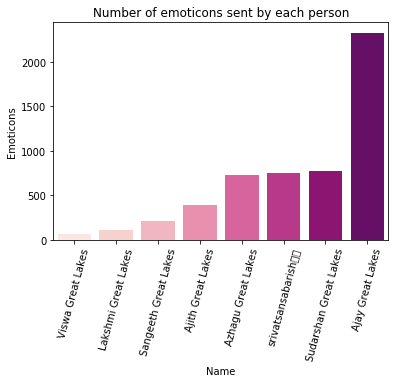

In [279]:
sns.barplot(x='Name', y='Emoticons', data=emoji,palette="RdPu").set_title('Number of emoticons sent by each person')
plt.xticks(rotation=75)

### Total chat count from each user

In [280]:
Message=df.groupby("Name")["Text"].count().sort_values()

In [281]:
Message=Message.reset_index(drop=False)
Message

,Name,Text
0,Lakshmi Great Lakes,68
1,Viswa Great Lakes,843
2,Ajith Great Lakes,1071
3,Sangeeth Great Lakes,1210
4,Azhagu Great Lakes,1860
5,Ajay Great Lakes,2235
6,Sudarshan Great Lakes,2276
7,srivatsansabarish😍,2395


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

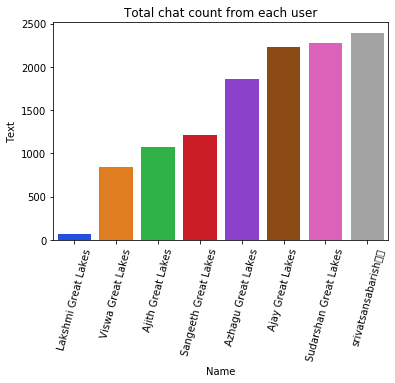

In [303]:
sns.barplot(x='Name', y='Text', data=Message,palette="bright").set_title("Total chat count from each user")
plt.xticks(rotation=75)

### Total count of words by each person

In [283]:
Text_len=df.groupby(['Name'])['Word_count'].sum()


In [284]:
Text_len=Text_len.reset_index(drop=False)
Text_len

,Name,Word_count
0,Ajay Great Lakes,42743
1,Ajith Great Lakes,17857
2,Azhagu Great Lakes,29735
3,Lakshmi Great Lakes,1041
4,Sangeeth Great Lakes,28391
5,Sudarshan Great Lakes,60132
6,Viswa Great Lakes,17556
7,srivatsansabarish😍,70325


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

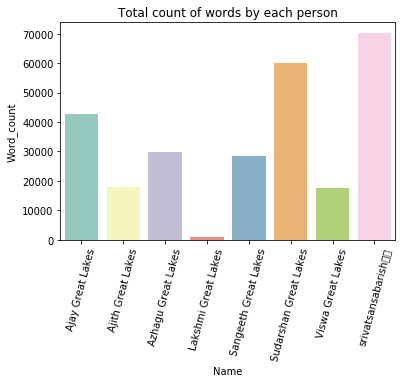

In [285]:
sns.barplot(x='Name', y='Word_count', data=Text_len,palette="Set3").set_title("Total count of words by each person")
plt.xticks(rotation=75)

### Media shared by each person

In [286]:
Media=df.groupby("Name")["Media"].sum().sort_values()

In [287]:
Media=Media.reset_index(drop=False)

In [288]:
Media

,Name,Media
0,Lakshmi Great Lakes,1.0
1,Viswa Great Lakes,53.0
2,Sudarshan Great Lakes,65.0
3,Ajith Great Lakes,89.0
4,srivatsansabarish😍,96.0
5,Ajay Great Lakes,107.0
6,Sangeeth Great Lakes,181.0
7,Azhagu Great Lakes,217.0


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

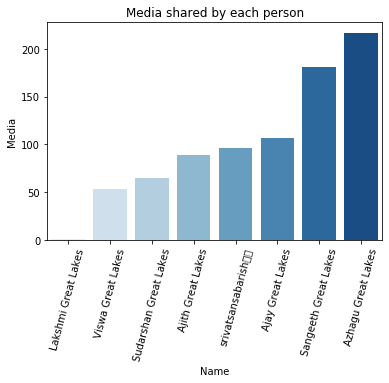

In [289]:
sns.barplot(x='Name', y='Media', data=Media,palette="Blues").set_title("Media shared by each person")
plt.xticks(rotation=75)
plt.xticks(rotation=75)

### Amount of Media shared in each month

In [290]:
month_media=df.groupby(df['Date'].dt.strftime('%B'))['Media'].sum()


In [291]:
month_media

Date
April         35.0
August       102.0
December      17.0
February       7.0
January       11.0
July          11.0
March          0.0
November     290.0
October      224.0
September    112.0
Name: Media, dtype: float64

In [292]:
month_media=month_media.reset_index(drop=False)

In [293]:
month_media

,Date,Media
0,April,35.0
1,August,102.0
2,December,17.0
3,February,7.0
4,January,11.0
5,July,11.0
6,March,0.0
7,November,290.0
8,October,224.0
9,September,112.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

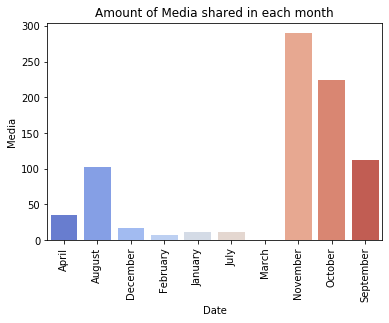

In [294]:
sns.barplot(x="Date",y="Media",data=month_media,palette="coolwarm").set_title("Amount of Media shared in each month")
plt.xticks(rotation=90)

### Total Number of chats in each month

In [295]:
month_text=df.groupby(df['Date'].dt.strftime('%B'))['Text'].count().sort_values()

In [296]:
month_text=month_text.reset_index(drop=False)
month_text

,Date,Text
0,March,25
1,January,75
2,February,137
3,April,283
4,December,589
5,July,634
6,September,1645
7,August,2293
8,October,2381
9,November,3896


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

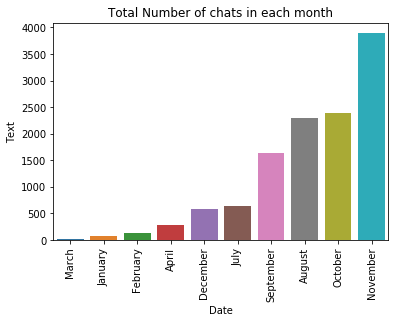

In [297]:
sns.barplot(x="Date",y="Text",data=month_text).set_title("Total Number of chats in each month")
plt.xticks(rotation=90)

### Number of Text by hour 

In [298]:
df['Time']= pd.to_datetime(df['Time'])

In [299]:
df["Time"].dt.hour

2        20
3        20
4        20
5        20
6        20
         ..
12214    20
12215    20
12216    20
12217    20
12218    20
Name: Time, Length: 11958, dtype: int64

In [306]:
hour_text=df.groupby([df["Time"].dt.hour])["Text"].count().sort_values()

In [307]:
hour_text=hour_text.reset_index(drop=False)
hour_text

,Time,Text
0,4,1
1,3,2
2,5,8
3,6,9
4,2,17
5,1,50
6,7,77
7,8,235
8,15,385
9,0,390


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

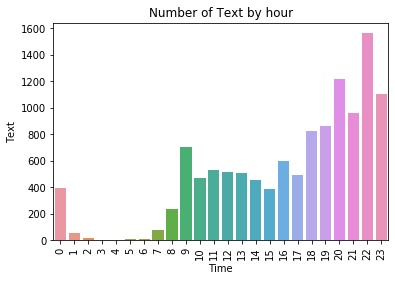

In [302]:
sns.barplot(x="Time",y="Text",data=hour_text).set_title("Number of Text by hour")
plt.xticks(rotation=90)

#### It shows that 8 P.M to 12 P.M the group becomes very active.